# <a id='toc1_'></a>[<span style=Color:Yellow>ECG Signal Analysis</span>](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [<span style=Color:Yellow>ECG Signal Analysis</span>](#toc1_)    
- [Step 1: Import necessary libraries](#toc2_)    
- [Step 2: Load ECG data](#toc3_)    
- [Step 3: Calculate frequency spectrum using Welch's method](#toc4_)    
- [Step 4: Identify key peaks in different frequency ranges](#toc5_)    
  - [Step 4.1: Primary heart rhythm](#toc5_1_)    
  - [Step 4.2: Audible heart sounds (20–100 Hz: valve closures)](#toc5_2_)    
  - [Step 4.3: Power line interference](#toc5_3_)    
- [Step 4: Create visualization](#toc6_)    
  - [Step 4.1: Raw ECG signal](#toc6_1_)    
  - [Step 4.2: Full frequency spectrum (0–70 Hz)](#toc6_2_)    
  - [Step 4.3: Zoomed-in on audible range (20–100 Hz) with electrical noise](#toc6_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

- An ECG is an electrical signal, not a sound, 
<div style='text-align:center'>
    <img src='Image/ECG.jpg' width=200>
</div>
- but it can be `transformed` into audible sound through signal processing

# <a id='toc2_'></a>[Step 1: Import necessary libraries](#toc0_)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.datasets import electrocardiogram
from scipy.signal import welch

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams.update({'font.size': 12})

# <a id='toc3_'></a>[Step 2: Load ECG data](#toc0_)
measures heart's electrical activity

In [20]:
ecg = electrocardiogram()
fs = 360  # Sampling frequency (Hz)
time = np.arange(ecg.size) / fs

# Use 30-second segment for better frequency resolution
segment_duration = 30  # seconds
segment_length = int(segment_duration * fs)
ecg_segment = ecg[:segment_length]
time_segment = time[:segment_length]

# <a id='toc4_'></a>[Step 3: Calculate frequency spectrum using Welch's method](#toc0_)

In [21]:
frequencies, power = welch(
    ecg_segment, 
    fs, 
    nperseg=2048  # Larger window improves frequency detail
)

# <a id='toc5_'></a>[Step 4: Identify key peaks in different frequency ranges](#toc0_)

## <a id='toc5_1_'></a>[Step 4.1: Primary heart rhythm](#toc0_)

infrasound range: 0.5–2 Hz<br>
<div style='text-align:center'>
    <img src='Image/rhythm.jpeg' width=250>
</div>

In [22]:
rhythm_mask = (frequencies >= 0.5) & (frequencies <= 2)
rhythm_peak_idx = np.argmax(power[rhythm_mask])
rhythm_freq = frequencies[rhythm_mask][rhythm_peak_idx]
rhythm_power = power[rhythm_mask][rhythm_peak_idx]

# Print information about primary heart rhythm peak
print("=== Primary Heart Rhythm (Infrasound) ===")
print(f"Frequency: {rhythm_freq:.2f} Hz")
print(f"Corresponding heart rate: ~{int(rhythm_freq * 60)} BPM (beats per minute)")
print(f"Power: {rhythm_power:.2f} (signal strength)")
print("Description: This inaudible peak represents the regular contraction/relaxation rhythm of the heart.\n")

=== Primary Heart Rhythm (Infrasound) ===
Frequency: 1.76 Hz
Corresponding heart rate: ~105 BPM (beats per minute)
Power: 0.03 (signal strength)
Description: This inaudible peak represents the regular contraction/relaxation rhythm of the heart.



## <a id='toc5_2_'></a>[Step 4.2: Audible heart sounds (20–100 Hz: valve closures)](#toc0_)

Tthe "`lub-dub`" sounds we can hear with a `stethoscope`.<br>
<div style='text-align:center'>
    <img src='Image/heart_valve.jpeg' height=150>
    <img src='Image/stethoscope.jpeg' height=150>
</div>

In [23]:
audible_mask = (frequencies >= 20) & (frequencies <= 100)

audible_peak_idx = np.argmax(power[audible_mask])
audible_freq = frequencies[audible_mask][audible_peak_idx]
audible_power = power[audible_mask][audible_peak_idx]

In [24]:
# Print information about audible heart sounds peak
print("=== Audible Heart Sounds ===")
print(f"Frequency: {audible_freq:.1f} Hz")
print(f"Power: {audible_power:.2f} (signal strength)")
print("Description: \nThis peak corresponds to audible 'lub-dub' sounds \nfrom heart valve closures, \nwithin the human hearing range.\n")

=== Audible Heart Sounds ===
Frequency: 21.6 Hz
Power: 0.00 (signal strength)
Description: 
This peak corresponds to audible 'lub-dub' sounds 
from heart valve closures, 
within the human hearing range.



## <a id='toc5_3_'></a>[Step 4.3: Power line interference](#toc0_)

50–60 Hz: electrical noise<br>
<div style='text-align:center'>
    <img src='Image/power_line.jpeg' width=200>
</div>

In [ ]:
mains_mask = (frequencies >= 50) & (frequencies <= 60)

mains_peak_idx = np.argmax(power[mains_mask])
mains_freq = frequencies[mains_mask][mains_peak_idx]
mains_power = power[mains_mask][mains_peak_idx]

=== Power Line Interference ===
Frequency: 59.9 Hz
Power: 0.00 (signal strength)
Description: 
This peak is external electrical noise 
from AC power grids (not a biological signal).



In [ ]:
# Print information about power line interference
print("=== Power Line Interference ===")
print(f"Frequency: {mains_freq:.1f} Hz")
print(f"Power: {mains_power:.2f} (signal strength)")
print("Description: \nThis peak is external electrical noise \nfrom AC power grids (not a biological signal).\n")

# <a id='toc6_'></a>[Step 4: Create visualization](#toc0_)

## <a id='toc6_1_'></a>[Step 4.1: Raw ECG signal](#toc0_)

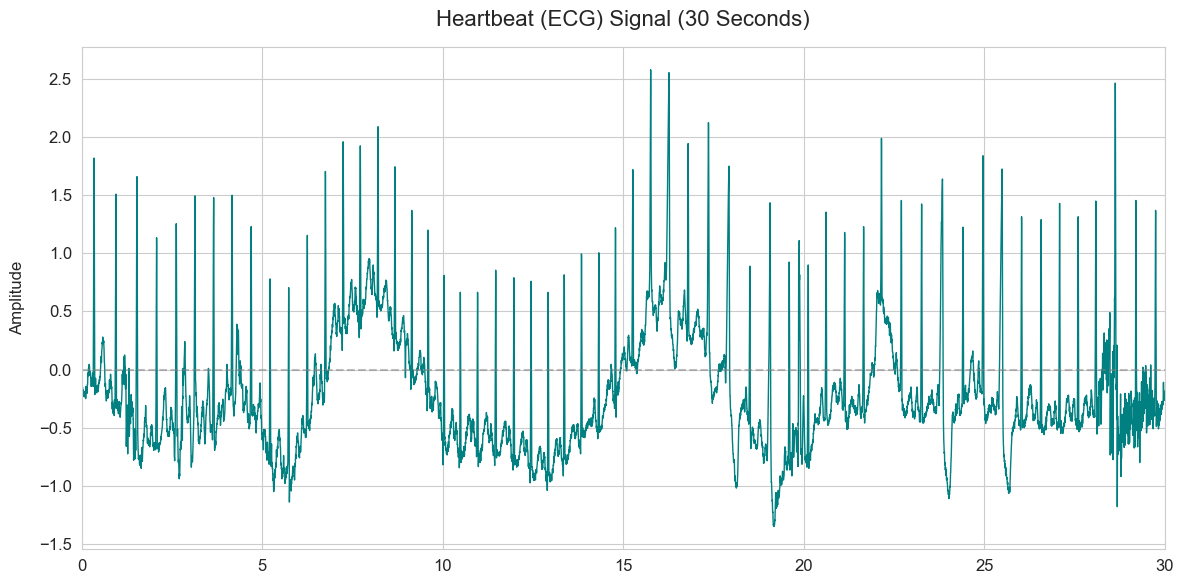

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(time_segment, ecg_segment, color='teal', linewidth=1)
plt.title("Heartbeat (ECG) Signal (30 Seconds)", fontsize=16, pad=15)
plt.ylabel("Amplitude", fontsize=12, labelpad=10)
plt.xlim(0, segment_duration)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## <a id='toc6_2_'></a>[Step 4.2: Full frequency spectrum (0–70 Hz)](#toc0_)

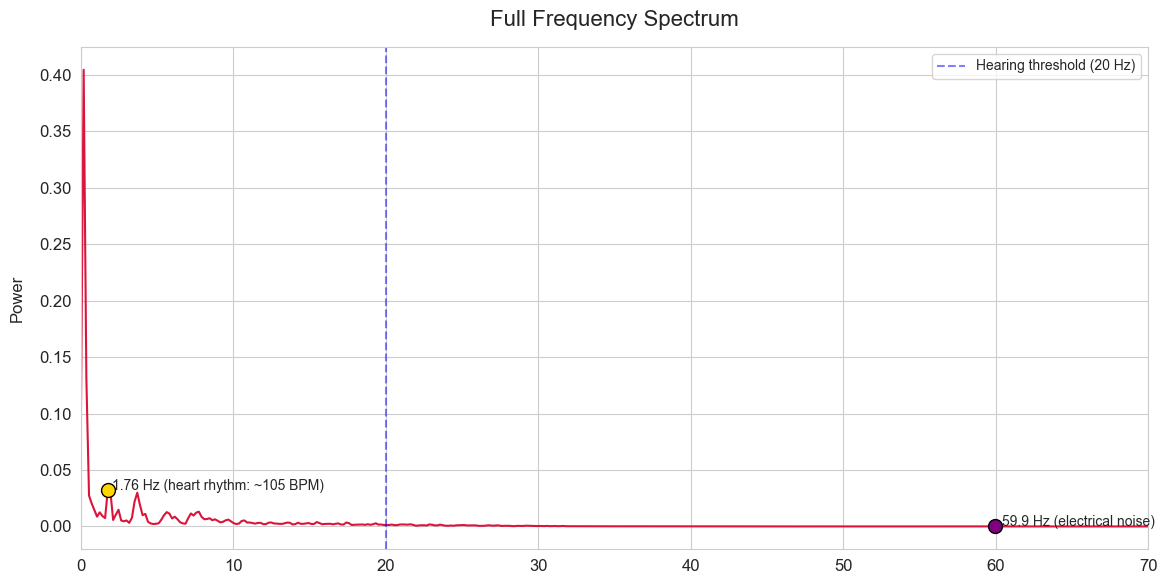

In [27]:
# Figure 2: Full frequency spectrum (0–70 Hz)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power, color='crimson', linewidth=1.5)

# Annotate heart rhythm peak (infrasound)
plt.scatter(rhythm_freq, rhythm_power, color='gold', s=100, zorder=5, edgecolors='black')
plt.text(rhythm_freq + 0.3, rhythm_power, 
         f"{rhythm_freq:.2f} Hz (heart rhythm: ~{int(rhythm_freq*60)} BPM)", 
         fontsize=10)

# Annotate power line interference
if mains_freq:
    plt.scatter(mains_freq, mains_power, color='purple', s=100, zorder=5, edgecolors='black')
    plt.text(mains_freq + 0.5, mains_power, 
             f"{mains_freq:.1f} Hz (electrical noise)", 
             fontsize=10)

plt.title("Full Frequency Spectrum", fontsize=16, pad=15)
plt.ylabel("Power", fontsize=12, labelpad=10)
plt.xlim(0, 70)
plt.axvline(x=20, color='blue', linestyle='--', alpha=0.5, label='Hearing threshold (20 Hz)')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

## <a id='toc6_3_'></a>[Step 4.3: Zoomed-in on audible range (20–100 Hz) with electrical noise](#toc0_)

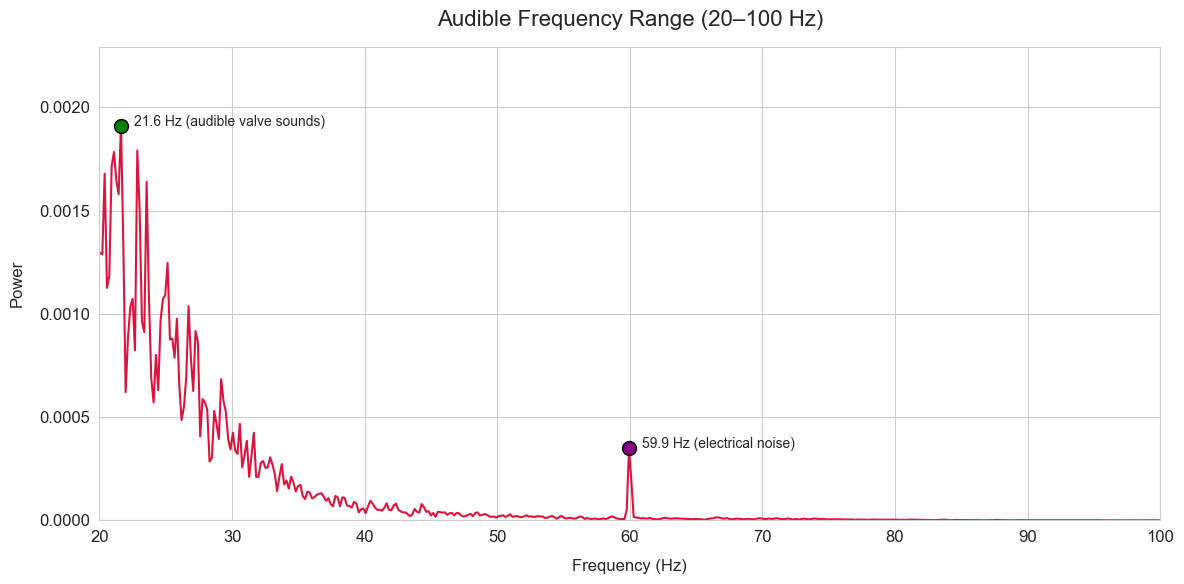

In [28]:
# Figure 3: Zoomed-in on audible range (20–100 Hz) with electrical noise
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power, color='crimson', linewidth=1.5)

# Annotate audible heart sounds (valve closures)
if audible_freq:
    plt.scatter(audible_freq, audible_power, color='green', s=100, zorder=5, edgecolors='black')
    plt.text(audible_freq + 1, audible_power, 
             f"{audible_freq:.1f} Hz (audible valve sounds)", 
             fontsize=10)

# Annotate power line interference (electrical noise) in audible range
if mains_freq:
    plt.scatter(mains_freq, mains_power, color='purple', s=100, zorder=5, edgecolors='black')
    plt.text(mains_freq + 1, mains_power, 
             f"{mains_freq:.1f} Hz (electrical noise)", 
             fontsize=10)

plt.title("Audible Frequency Range (20–100 Hz)", fontsize=16, pad=15)
plt.xlabel("Frequency (Hz)", fontsize=12, labelpad=10)
plt.ylabel("Power", fontsize=12, labelpad=10)
plt.xlim(20, 100)
# Adjust y-axis to show both peaks clearly
if np.any(audible_mask) or mains_freq:
    max_power = max(
        max(power[audible_mask]) if np.any(audible_mask) else 0,
        mains_power if mains_freq else 0
    )
    plt.ylim(0, max_power * 1.2)
else:
    plt.ylim(0, None)

plt.tight_layout()
plt.show()